In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pandas as pd

data = np.loadtxt('/home/brianbg/Documents/ML2023/houses.txt', delimiter=',').T


In [5]:
xh=data[0:4]
th=data[-1]

Text(0.5, 1.0, 'Antiguedad en años')

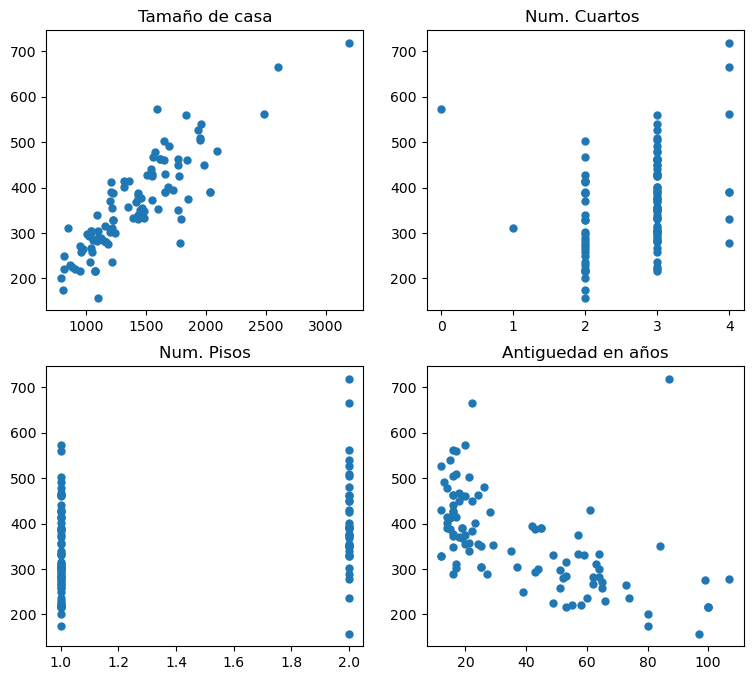

In [6]:
fig = plt.figure(figsize=(9, 8))
ax = fig.subplots(2,2)

ax[0,0].scatter(xh[0], th, s=25)
ax[0,0].set_title('Tamaño de casa')

ax[0,1].scatter(xh[1], th, s=25)
ax[0,1].set_title('Num. Cuartos ')

ax[1,0].scatter(xh[2], th, s=25)
ax[1,0].set_title('Num. Pisos')

ax[1,1].scatter(xh[3], th, s=25)
ax[1,1].set_title('Antiguedad en años')

In [24]:
def gradient_descent(x, y, iterations, w0, learning_rate, tolerance):
    X = np.vstack([np.ones_like(x[0]), x[0], x[1], x[2], x[3]]).T
    current_w = np.array(w0, dtype=float)  # change this line
    cost_array = np.array([])

    for i in range(iterations):
        gradient = (X.T @ (X @ current_w - y)) / len(x)

        if i % 20000 == 0:
            print(f'Iteration {i}  w:{current_w}')

        if np.all(np.abs(learning_rate * gradient) < tolerance):
            print(f'Converged in {i} iterations.')
            break

        current_w -= learning_rate * gradient
        cost_array = np.insert(cost_array, 0, np.sum((X @ current_w - y)**2))

    return cost_array, current_w

Iteration 0  w:[0. 0. 0. 0. 0.]
Iteration 20000  w:[1.11390904e-04 1.67477750e-01 3.04302061e-04 1.55864774e-04
 3.67344132e-03]
Iteration 40000  w:[1.50492639e-04 2.24080511e-01 4.05008783e-04 2.05822078e-04
 4.69900218e-03]
Iteration 60000  w:[1.65165425e-04 2.43214063e-01 4.36913228e-04 2.19989052e-04
 4.82983517e-03]
Iteration 80000  w:[1.71583194e-04 2.49685231e-01 4.45567499e-04 2.22061153e-04
 4.65840239e-03]
Iteration 100000  w:[1.75211782e-04 2.51877258e-01 4.46365519e-04 2.20046050e-04
 4.38492104e-03]
Iteration 120000  w:[1.77898317e-04 2.52623185e-01 4.44509527e-04 2.16649860e-04
 4.07705269e-03]
Iteration 140000  w:[1.80267021e-04 2.52880412e-01 4.41757570e-04 2.12787093e-04
 3.75766290e-03]
Iteration 160000  w:[1.82528843e-04 2.52972487e-01 4.38703766e-04 2.08766797e-04
 3.43447883e-03]
Iteration 180000  w:[1.84755070e-04 2.53008746e-01 4.35548890e-04 2.04693415e-04
 3.11011178e-03]


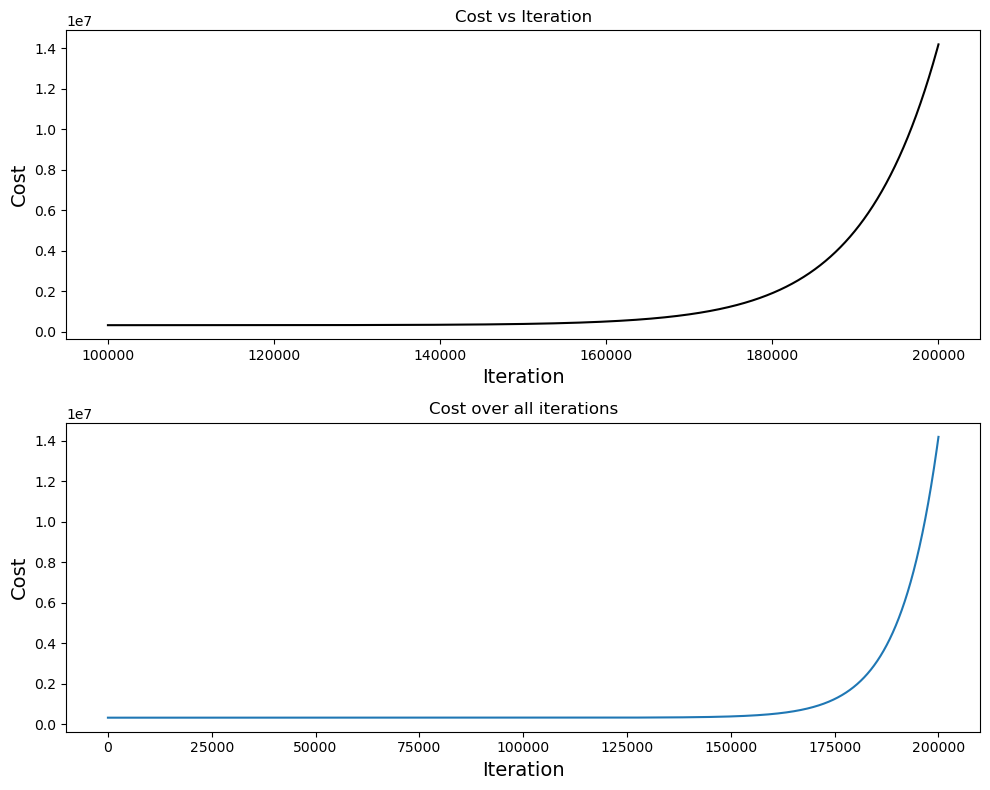

In [26]:
iterations = 200000

cost, w_h = gradient_descent(xh, th, iterations, [0, 0, 0, 0, 0], 1e-12, 1e-15)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(np.arange(100001, iterations, 1), cost[100000:iterations-1])
axs[0].set_xlabel('Iteration', fontsize=14)
axs[0].set_ylabel('Cost', fontsize=14)
axs[0].set_title('Cost vs Iteration')

axs[1].plot(cost)
axs[1].set_xlabel('Iteration', fontsize=14)
axs[1].set_ylabel('Cost', fontsize=14)
axs[1].set_title('Cost over all iterations')

plt.tight_layout()
plt.show()


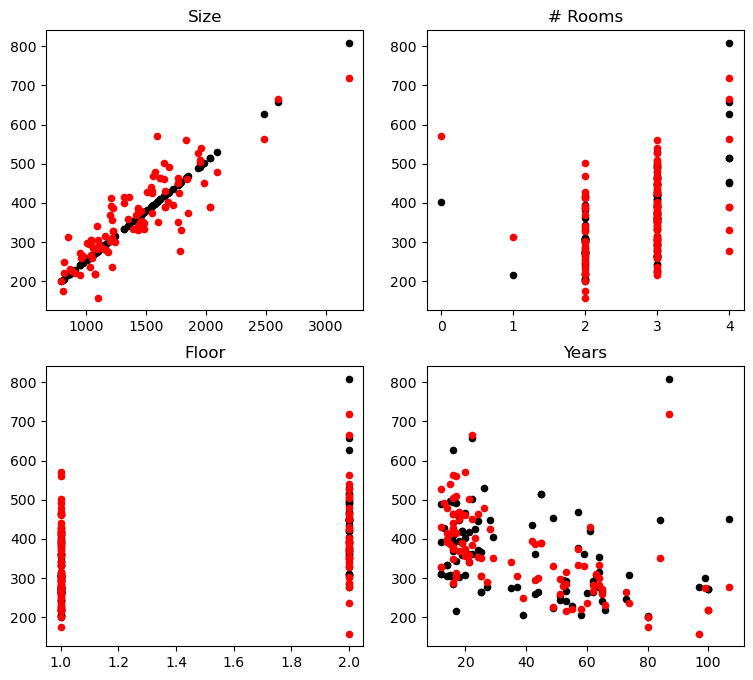

In [27]:
predictions = w_h[0] + sum(xh[i-1]*w_h[i] for i in range(1, len(w_h)))

fig, ax = plt.subplots(2, 2, figsize=(9, 8))
titles = ['Size', '# Rooms', 'Floor', 'Years']

for i in range(4):
    row, col = divmod(i, 2)
    ax[row, col].scatter(xh[i], predictions, s=20, color='black')
    ax[row, col].scatter(xh[i], th, s=20, color='red')
    ax[row, col].set_title(titles[i])

plt.show()

Iteration 0  w:[0. 0. 0. 0. 0.]
Iteration 20000  w:[ 1.81119534e-04  3.13548253e-04 -1.07794735e-04 -1.08194019e-04
 -9.75594986e-05]
Iteration 40000  w:[ 0.00036224  0.0006271  -0.00021559 -0.00021639 -0.00019512]
Iteration 60000  w:[ 0.00054336  0.00094064 -0.00032338 -0.00032458 -0.00029268]
Iteration 80000  w:[ 0.00072448  0.00125419 -0.00043118 -0.00043277 -0.00039024]
Iteration 100000  w:[ 0.00090559  0.00156773 -0.00053897 -0.00054097 -0.0004878 ]
Iteration 120000  w:[ 0.00108671  0.00188128 -0.00064676 -0.00064916 -0.00058535]
Iteration 140000  w:[ 0.00126783  0.00219482 -0.00075456 -0.00075735 -0.00068291]
Iteration 160000  w:[ 0.00144894  0.00250836 -0.00086235 -0.00086554 -0.00078047]
Iteration 180000  w:[ 0.00163006  0.00282191 -0.00097014 -0.00097374 -0.00087803]


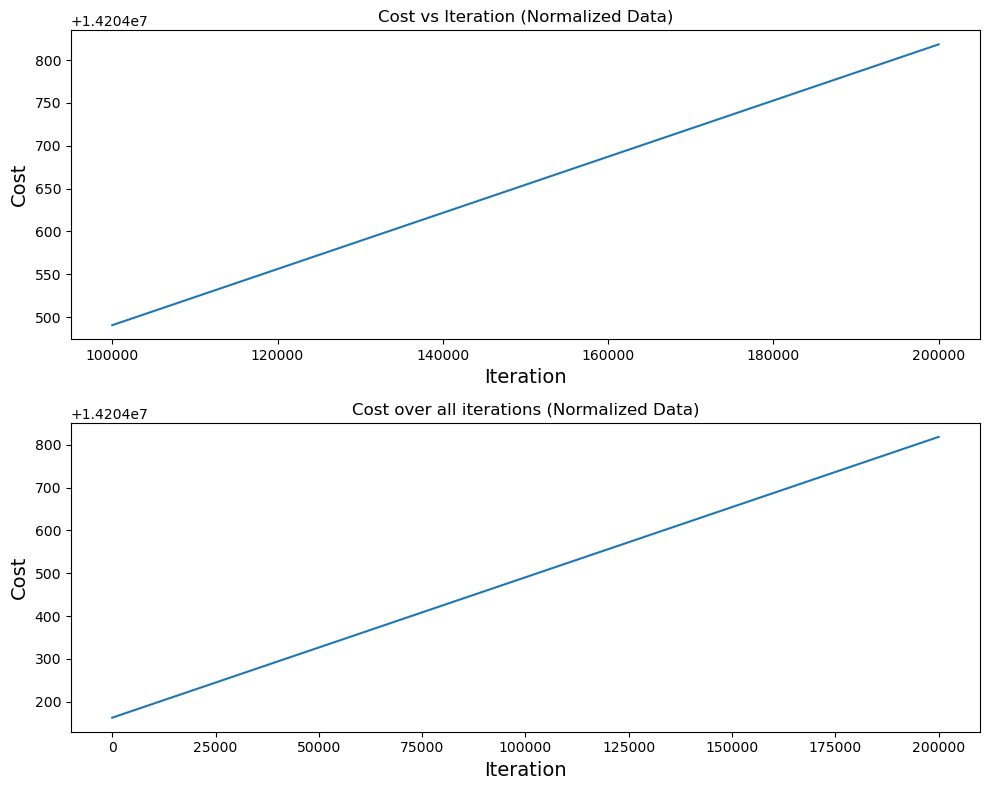

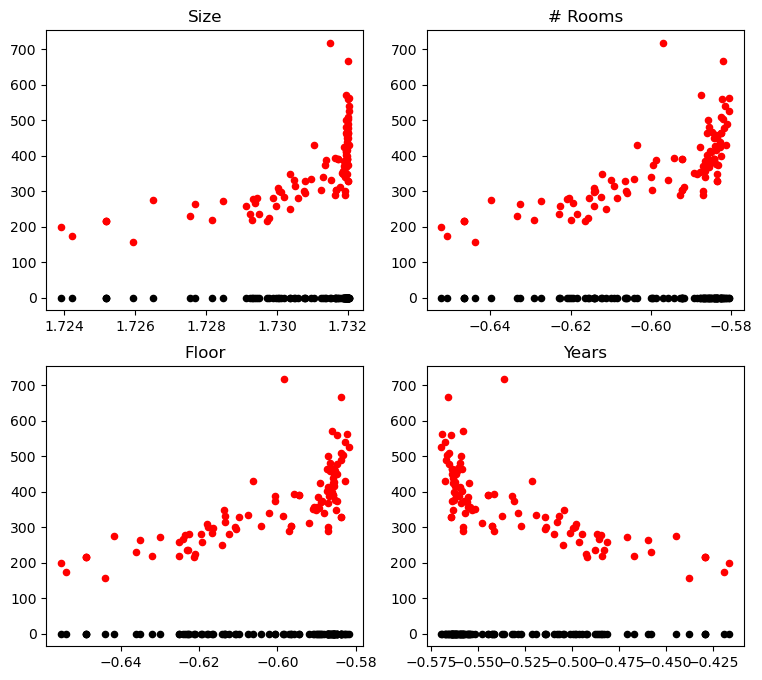

In [28]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
xh_normalized = scaler.fit_transform(xh)

# Perform gradient descent on normalized data
cost_normalized, w_h_normalized = gradient_descent(xh_normalized, th, iterations, [0, 0, 0, 0, 0], 1e-12, 1e-15)

# Plot the cost vs iteration for normalized data
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(np.arange(100001, iterations, 1), cost_normalized[100000:iterations-1])
axs[0].set_xlabel('Iteration', fontsize=14)
axs[0].set_ylabel('Cost', fontsize=14)
axs[0].set_title('Cost vs Iteration (Normalized Data)')

# Plot the cost over all iterations for normalized data
axs[1].plot(cost_normalized)
axs[1].set_xlabel('Iteration', fontsize=14)
axs[1].set_ylabel('Cost', fontsize=14)
axs[1].set_title('Cost over all iterations (Normalized Data)')

plt.tight_layout()
plt.show()

# Calculate predictions on normalized data
predictions_normalized = w_h_normalized[0] + sum(xh_normalized[i-1]*w_h_normalized[i] for i in range(1, len(w_h_normalized)))

# Plot the predictions on normalized data
fig, ax = plt.subplots(2, 2, figsize=(9, 8))
titles = ['Size', '# Rooms', 'Floor', 'Years']

for i in range(4):
    row, col = divmod(i, 2)
    ax[row, col].scatter(xh_normalized[i], predictions_normalized, s=20, color='black')
    ax[row, col].scatter(xh_normalized[i], th, s=20, color='red')
    ax[row, col].set_title(titles[i])

plt.show()


In [31]:
# Define the characteristics of the house
size = 1200
num_rooms = 3
floors = 1
years = 4

# Normalize the characteristics using the same scaler used for training
scaler = StandardScaler()
normalized_characteristics = scaler.fit_transform([[size, num_rooms, floors, years]])

# Calculate the prediction using the normalized characteristics and the model weights
prediction = w_h_normalized[0] + sum(normalized_characteristics[0][i-1]*w_h_normalized[i] for i in range(1, len(w_h_normalized)))

# Print the predicted value
print("Predicted value of the house:", prediction)


Predicted value of the house: 0.0018111749703539153
